# Investigating  a TMDB Data set 

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

#####  The Movie Database(TMDb) is a cleaned data collected from [Udemy](https://www.google.com/url?q=https://d17h27t6h515a5.cloudfront.net/topher/2017/October/59dd1c4c_tmdb-movies/tmdb-movies.csv&sa=D&ust=1532469042115000). This data set contains  information of about 10,000 movies. <br>
 ##### The data set has: 10866 entries , 21 columns 

##### some of the analysis carried out are: 
1. The year that has the highest revenue
2. the year that has the highest released movies
3. the year that has the highest profit
4. The movie with the highest profit
5. Theh movie with the highest revenue
6. The production company with the highest revenue
7. How the average runtime affect vote ratings


<a id='wrangling'></a>
## Data Wrangling

### import all necessary libraries needed and load the data 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df=pd.read_csv('tmdb-movies.csv')

In [3]:
#### print out the first five of the data set
df.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


In [4]:
#### check for information of the data to investigate missing values, null values.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10866 non-null  int64  
 1   imdb_id               10856 non-null  object 
 2   popularity            10866 non-null  float64
 3   budget                10866 non-null  int64  
 4   revenue               10866 non-null  int64  
 5   original_title        10866 non-null  object 
 6   cast                  10790 non-null  object 
 7   homepage              2936 non-null   object 
 8   director              10822 non-null  object 
 9   tagline               8042 non-null   object 
 10  keywords              9373 non-null   object 
 11  overview              10862 non-null  object 
 12  runtime               10866 non-null  int64  
 13  genres                10843 non-null  object 
 14  production_companies  9836 non-null   object 
 15  release_date       

array([[<AxesSubplot:title={'center':'id'}>,
        <AxesSubplot:title={'center':'popularity'}>,
        <AxesSubplot:title={'center':'budget'}>],
       [<AxesSubplot:title={'center':'revenue'}>,
        <AxesSubplot:title={'center':'runtime'}>,
        <AxesSubplot:title={'center':'vote_count'}>],
       [<AxesSubplot:title={'center':'vote_average'}>,
        <AxesSubplot:title={'center':'release_year'}>,
        <AxesSubplot:title={'center':'budget_adj'}>],
       [<AxesSubplot:title={'center':'revenue_adj'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

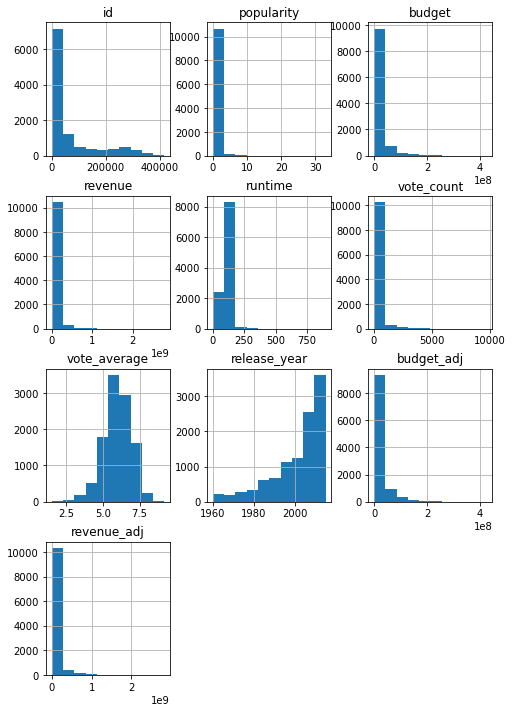

In [5]:
df.hist(figsize = (8,12))

The info above shows that the release_date is the form of data type **object**

In [6]:
#### check the missing values for each column
print(df.isnull().sum())
print(df.isnull().sum().sum())

id                         0
imdb_id                   10
popularity                 0
budget                     0
revenue                    0
original_title             0
cast                      76
homepage                7930
director                  44
tagline                 2824
keywords                1493
overview                   4
runtime                    0
genres                    23
production_companies    1030
release_date               0
vote_count                 0
vote_average               0
release_year               0
budget_adj                 0
revenue_adj                0
dtype: int64
13434


There are 13434 missing values in total contained in the data set.

array([[<AxesSubplot:title={'center':'id'}>,
        <AxesSubplot:title={'center':'popularity'}>,
        <AxesSubplot:title={'center':'budget'}>],
       [<AxesSubplot:title={'center':'revenue'}>,
        <AxesSubplot:title={'center':'runtime'}>,
        <AxesSubplot:title={'center':'vote_count'}>],
       [<AxesSubplot:title={'center':'vote_average'}>,
        <AxesSubplot:title={'center':'release_year'}>,
        <AxesSubplot:title={'center':'budget_adj'}>],
       [<AxesSubplot:title={'center':'revenue_adj'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

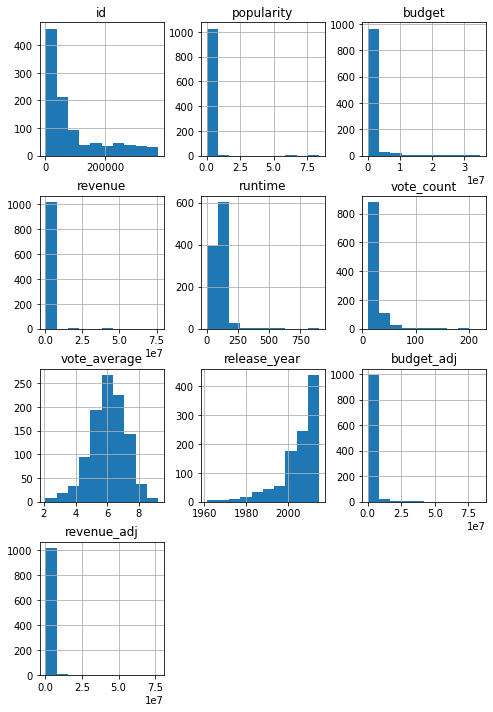

In [7]:
df[df.production_companies.isnull()].hist(figsize = (8,12))

In [8]:
#### check for any duplivated values
df.duplicated().value_counts()

False    10865
True         1
dtype: int64

In [9]:
#### check for unique values
df.nunique(axis=0)

id                      10865
imdb_id                 10855
popularity              10814
budget                    557
revenue                  4702
original_title          10571
cast                    10719
homepage                 2896
director                 5067
tagline                  7997
keywords                 8804
overview                10847
runtime                   247
genres                   2039
production_companies     7445
release_date             5909
vote_count               1289
vote_average               72
release_year               56
budget_adj               2614
revenue_adj              4840
dtype: int64

In [10]:
df.mean(axis=0)

id              6.606418e+04
popularity      6.464410e-01
budget          1.462570e+07
revenue         3.982332e+07
runtime         1.020709e+02
vote_count      2.173897e+02
vote_average    5.974922e+00
release_year    2.001323e+03
budget_adj      1.755104e+07
revenue_adj     5.136436e+07
dtype: float64

In [11]:
#### check the brief summary of the data set
df.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,66064.177434,0.646441,1.462570e+07,3.982332e+07,102.070863,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,92130.136561,1.000185,3.091321e+07,1.170035e+08,31.381405,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10596.250000,0.207583,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20669.000000,0.383856,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75610.000000,0.713817,1.500000e+07,2.400000e+07,111.000000,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


### Observations
1. There are 10866 rows and 21 columns
2. there are some missing data in the 'home page', 'cast', 'director', 'tagline'                        'production_companies', 'keywords'.
3. one duplicated value count which will affect the analysis and need to be droppede.
4. There are some colums which are not needed in my analysis that also needs to be dropped.
5. The release_date column is in object data type and should be changed to date time format
6. There are 13434 missing values in total and should be fill with 0

## Data Cleaning
I will drop the duplicated value and the columns that are not needed in my analysis

In [12]:
#### drop the duplicated value
df.drop_duplicates(inplace = True)

In [13]:
#### check if the duplicated vcalue has been dropped 
df.duplicated().value_counts()

False    10865
dtype: int64

In [14]:
#### drop the columns not needed
df.drop(['imdb_id', 'tagline', 'homepage', 'overview', 'popularity'], axis = 1, inplace = True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10865 entries, 0 to 10865
Data columns (total 16 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10865 non-null  int64  
 1   budget                10865 non-null  int64  
 2   revenue               10865 non-null  int64  
 3   original_title        10865 non-null  object 
 4   cast                  10789 non-null  object 
 5   director              10821 non-null  object 
 6   keywords              9372 non-null   object 
 7   runtime               10865 non-null  int64  
 8   genres                10842 non-null  object 
 9   production_companies  9835 non-null   object 
 10  release_date          10865 non-null  object 
 11  vote_count            10865 non-null  int64  
 12  vote_average          10865 non-null  float64
 13  release_year          10865 non-null  int64  
 14  budget_adj            10865 non-null  float64
 15  revenue_adj        

In [15]:
#### fill the missing values with 0
df.fillna(0)

,id,budget,revenue,original_title,cast,director,keywords,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,monster|dna|tyrannosaurus rex|velociraptor|island,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,future|chase|post-apocalyptic|dystopia|australia,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,based on novel|revolution|dystopia|sequel|dyst...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,android|spaceship|jedi|space opera|3d,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,James Wan,car race|speed|revenge|suspense|car,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10861,21,0,0,The Endless Summer,Michael Hynson|Robert August|Lord 'Tally Ho' B...,Bruce Brown,surfer|surfboard|surfing,95,Documentary,Bruce Brown Films,6/15/66,11,7.4,1966,0.000000e+00,0.000000e+00
10862,20379,0,0,Grand Prix,James Garner|Eva Marie Saint|Yves Montand|Tosh...,John Frankenheimer,car race|racing|formula 1,176,Action|Adventure|Drama,Cherokee Productions|Joel Productions|Douglas ...,12/21/66,20,5.7,1966,0.000000e+00,0.000000e+00
10863,39768,0,0,Beregis Avtomobilya,Innokentiy Smoktunovskiy|Oleg Efremov|Georgi Z...,Eldar Ryazanov,car|trolley|stealing car,94,Mystery|Comedy,Mosfilm,1/1/66,11,6.5,1966,0.000000e+00,0.000000e+00
10864,21449,0,0,"What's Up, Tiger Lily?",Tatsuya Mihashi|Akiko Wakabayashi|Mie Hama|Joh...,Woody Allen,spoof,80,Action|Comedy,Benedict Pictures Corp.,11/2/66,22,5.4,1966,0.000000e+00,0.000000e+00


In [16]:
#### Change the release_date from object format to date format
df['release_date'] = pd.to_datetime(df['release_date'])
df.release_date.head(5)

0   2015-06-09
1   2015-05-13
2   2015-03-18
3   2015-12-15
4   2015-04-01
Name: release_date, dtype: datetime64[ns]

<a id='eda'></a>
## Exploratory Data Analysis 

### Research Question 1: Which year has the highest revenue

In [17]:
###### Find the year with the highest revenue using groupby
ry = df.groupby('release_year').mean().revenue
print(ry.head())

release_year
1960    4.531406e+06
1961    1.089420e+07
1962    6.736870e+06
1963    5.511911e+06
1964    8.118614e+06
Name: revenue, dtype: float64


<function matplotlib.pyplot.show(close=None, block=None)>

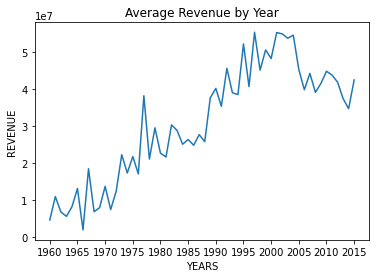

In [18]:
ry.plot(xticks=np.arange(1960, 2016, 5))
plt.title('Average Revenue by Year')
plt.ylabel('REVENUE')
plt.xlabel('YEARS')
plt.show

From the above line chart, we see that the year with the highest average revenue is between **1995** and **2000** with average revenue of more than **5 billion** and also between **2000 and 2005** with average revenue more than **5 billion**

### Research Question 2: Which year has the highest number of movie release

In [19]:
###### use the groupby function to count the number of id in each year
my = df.groupby('release_year').count().id
my.head(5)
my.tail(5)

release_year
2011    540
2012    588
2013    659
2014    700
2015    629
Name: id, dtype: int64

<function matplotlib.pyplot.show(close=None, block=None)>

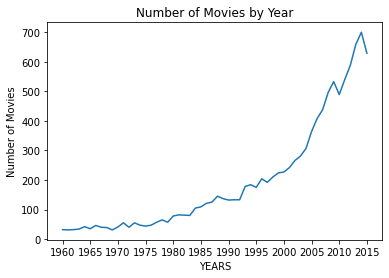

In [20]:
my.plot(xticks=np.arange(1960, 2016, 5))
plt.title('Number of Movies by Year')
plt.ylabel('Number of Movies')
plt.xlabel('YEARS')
plt.show

From the above line chart, the year with the **highest released movies is 2014** which is between 2010 and 2015

### Research Question 3: Which year has the highest profit and loss

In [21]:
###### create a profit column where profit = revenue - budget
df['profit'] = df.revenue - df.budget

In [22]:
min_vals = df.profit.min()
max_vals = df.profit.max()
min_max = (min_vals , max_vals)
min_max

(-413912431, 2544505847)

In [23]:
df.groupby('profit').agg({'release_year':[np.min , np.max]})

release_year      
                    amin  amax
profit                        
-413912431          2010  2010
-165710090          2013  2013
-150000000          2010  2010
-120000000          2010  2010
-119180039          2004  2004
...                  ...   ...
 1316249360         2015  2015
 1363528810         2015  2015
 1645034188         1997  1997
 1868178225         2015  2015
 2544505847         2009  2009

[5007 rows x 2 columns]

 The above result shows that **year 2010** has the highest loss of about **413 million** while **year 2009** has the highest profit of about **2.5 billion**

Text(0.5, 0, 'Years')

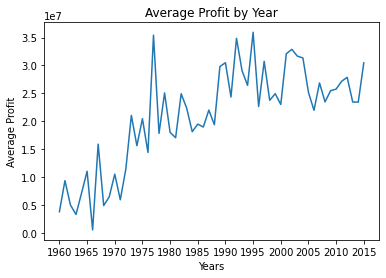

In [24]:
%matplotlib inline
df.groupby('release_year').mean().profit.plot(xticks = np.arange(1960,2016,5))
plt.title('Average Profit by Year')
plt.ylabel('Average Profit')
plt.xlabel('Years')

### Research Question 4: What movie has the highest and lowest revenue? 

In [25]:
%time
def min_max(y):
    """
    define a min_max function to show movie with the highest and lowest revenue
    min returns the index of minimum value in column y
    max returns the maximum value in column y
    """
    min = df[y].idxmin()
    max = df[y].idxmax()
    pd_min = pd.DataFrame(df.loc[min, :])
    pd_max = pd.DataFrame(df.loc[max, :])
    print('The movie with lowest ' +  y + ' is', df.original_title[min])
    print('The movie with highest ' +   y + ' is', df.original_title[max])
    return pd.concat([pd_min, pd_max], axis = 1)
min_max('revenue')

Wall time: 0 ns
The movie with lowest revenue is Wild Card
The movie with highest revenue is Avatar


,48,1386
id,265208,19995
budget,30000000,237000000
revenue,0,2781505847
original_title,Wild Card,Avatar
cast,Jason Statham|Michael Angarano|Milo Ventimigli...,Sam Worthington|Zoe Saldana|Sigourney Weaver|S...
director,Simon West,James Cameron
keywords,gambling|bodyguard|remake,culture clash|future|space war|space colony|so...
runtime,92,162
genres,Thriller|Crime|Drama,Action|Adventure|Fantasy|Science Fiction
production_companies,Current Entertainment|Lionsgate|Sierra / Affin...,Ingenious Film Partners|Twentieth Century Fox ...


Looking at table above, one see that **wild card** generated the lowest revenue of **0** while **Avatar** generated the highest revenue of about **2.3 trillion**.

### Research Question 5: What movie generated the highest profit and loss

In [26]:
##### I will use the function def which i have defined earlier.
min_max('profit')

The movie with lowest profit is The Warrior's Way
The movie with highest profit is Avatar


,2244,1386
id,46528,19995
budget,425000000,237000000
revenue,11087569,2781505847
original_title,The Warrior's Way,Avatar
cast,Kate Bosworth|Jang Dong-gun|Geoffrey Rush|Dann...,Sam Worthington|Zoe Saldana|Sigourney Weaver|S...
director,Sngmoo Lee,James Cameron
keywords,assassin|small town|revenge|deception|super speed,culture clash|future|space war|space colony|so...
runtime,100,162
genres,Adventure|Fantasy|Action|Western|Thriller,Action|Adventure|Fantasy|Science Fiction
production_companies,Boram Entertainment Inc.,Ingenious Film Partners|Twentieth Century Fox ...


**The warrior's way** generated a loss of about **413 million** while **Avatar** generated the highest profit of about **2.5 billion**

### Research Question 6: What movie has the longest and shortest running  time?

In [27]:
##### I will use the function def define earlier
min_max('runtime')

The movie with lowest runtime is Mythica: The Necromancer
The movie with highest runtime is The Story of Film: An Odyssey


,92,3894
id,370687,125336
budget,0,0
revenue,0,0
original_title,Mythica: The Necromancer,The Story of Film: An Odyssey
cast,Melanie Stone|Adam Johnson|Kevin Sorbo|Nicola ...,Mark Cousins|Jean-Michel Frodon|Cari Beauchamp...
director,A. Todd Smith,Mark Cousins
keywords,sword|magic|sorcery|necromancer,cinema|nouvelle vague|hindi cinema|cinema novo...
runtime,0,900
genres,Fantasy|Action|Adventure,Documentary
production_companies,Arrowstorm Entertainment|Camera 40 Productions...,NaN


**Mythica: The Necromancer** has the **shortest runtime** of 0 while **The Story of Film: An Odyssey** has the **longest runtime of 900**

### Research Question 7: Which genre has the highest number of movies?

In [28]:
#### Use the groupby fuction to count genres and id
df.groupby('genres').count().id

genres
Action                                      63
Action|Adventure                            15
Action|Adventure|Animation                   4
Action|Adventure|Animation|Comedy|Drama      1
Action|Adventure|Animation|Comedy|Family     1
                                            ..
Western|Drama|Crime|Romance                  1
Western|History                              1
Western|History|War                          1
Western|Horror|Thriller                      1
Western|Thriller                             1
Name: id, Length: 2039, dtype: int64

Actiion genres has the highest number of movies which is 63

### Research Question 8: What movie has the highest and lowest vote_average ?

In [29]:
###### We will use the groupby function to count vote_average and original_title
df.groupby(['vote_average','original_title']).count().id

vote_average  original_title               
1.5           Manos: The Hands of Fate         1
              Transmorphers                    1
2.0           Jurassic Shark                   1
2.1           Birdemic: Shock and Terror       1
              Sand Sharks                      1
                                              ..
8.7           Pink Floyd: Pulse                1
8.8           Black Mirror: White Christmas    1
              Life Cycles                      1
8.9           The Mask You Live In             1
9.2           The Story of Film: An Odyssey    1
Name: id, Length: 10850, dtype: int64

**Manos: The Hands of Fate and Transmorphers** has the **lowest ratings of 1** whhile The Story of Film: An **Odyssey** has the **highest ratings of 9.2**

### Research Question 9: Do movies with long runtime receive better vote_average?

In [30]:
### First get the mean amount of the runtime
df.runtime.mean()

102.07179015186378

In [31]:
## create class of movies below and above mean runtime
low_runtime = df.query('runtime < 102.07179015186378')
high_runtime = df.query('runtime >= 102.07179015186378')

## Verify that the queries included has exactly one sample
num_samples = df.shape[0]
num_samples == low_runtime['runtime'].count() + high_runtime['runtime'].count()

True

In [32]:
### We get the mean vote_average of the low_runtime and the high_runtime
low_runtime.vote_average.mean(), high_runtime.vote_average.mean()

(5.771223470661673, 6.268005384787982)

**Movies with average runtime greater than 102 get higher vote ratings than those below 102**

### Research Question 10: Which production companies has the highest profit ?

In [33]:
df.groupby('production_companies').agg({'profit': 'sum'}).nlargest(5,'profit')

,profit
production_companies,
Paramount Pictures,5978839360
Walt Disney Pictures|Pixar Animation Studios,5791558520
Marvel Studios,4676908966
DreamWorks Animation,4629741096
Blue Sky Studios|Twentieth Century Fox Animation,3305820202


Text(0.5, 0, 'Profit')

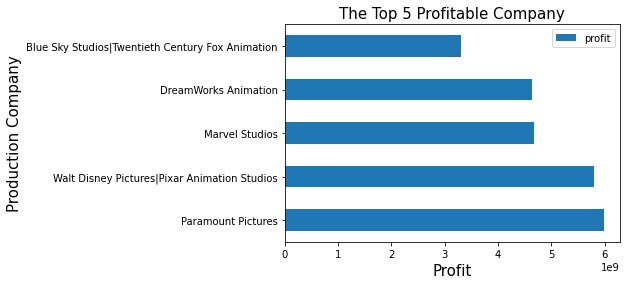

In [34]:
df.groupby('production_companies').agg({'profit': 'sum'}).nlargest(5,'profit').plot(y='profit', kind='barh')
plt.title('The Top 5 Profitable Company', fontsize= 15)
plt.ylabel('Production Company', fontsize= 15)
plt.xlabel('Profit', fontsize= 15)

**Paramount Pictures** production_company has the highest profit of about **5.9 billion**

### Research Question 11: What movie genrie has the highest profit?

In [39]:
#### Use the groupby agg function
df.groupby('genres').agg({'profit': 'sum'}).nlargest(5,'profit')

,profit
genres,
Comedy,13552672742
Drama,9320240615
Comedy|Romance,8132157435
Adventure|Fantasy|Action,5820583556
Animation|Family,4859226154


<function matplotlib.pyplot.show(close=None, block=None)>

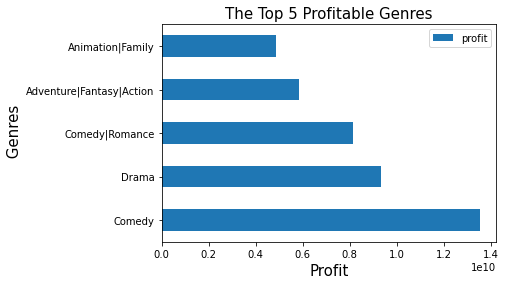

In [38]:
df.groupby('genres').agg({'profit': 'sum'}).nlargest(5,'profit').plot(y = 'profit', kind ='barh')
plt.title('The Top 5 Profitable Genres', fontsize= 15)
plt.ylabel(' Genres', fontsize= 15)
plt.xlabel('Profit', fontsize= 15)
plt.legend(bbox_to_anchor=(1,1), loc='best')
plt.show

The **Comedy** generates the highest average profit of about **13.5 billion**

### Research Question 12: What movie genres has the highest vote rating?

In [37]:
df.groupby('genres').agg({'vote_average': 'mean'}).nlargest(5,'vote_average')

,vote_average
genres,
Drama|Horror|Mystery|Science Fiction|Thriller,8.8
Music|Drama|Fantasy|Romance,8.4
Thriller|Documentary,8.2
Fantasy|Drama|Crime,8.0
History|Drama|Thriller|War,8.0


The **Drama|Horror|Mystery|Science Fiction|Thriller** genre has the highest mean vote rating of **8.8**

<a id='conclusions'></a>
## Conclusions

The data set i worked with is a clean data, thus making my work easier. The following recommendations should be considered from the above analysis:<br>
1. Avatar generated the highest profit so the producer company should consider producing Avatar2.
2. Year 2009 has generated the highest profit so far, therefore the tecnquines or tools used in 2009    should be considered if the producer companies want to generate such profit again.
3. Producer companies should produce more of Comedy genre if they want to generate more profit.
4. Producer should produce more of Drama|Horror|Mystery|Science Fiction|Thriller if they desire to      get more vote ratings.
5. To get more vote ratings, movies with average runtime greater than 102mins should be produced        more.
